# GoLive speed charts


The idea of this notebook is *learn* xarray basics motivated by a task: Visualize time-series variations in glacier
speed using data produced by GoLIVE; which in turn estimates surface ice velocity using Landsat-8 data.


[The GoLIVE interface hosted by NSIDC](https://nsidc.org/app/golive)


We take as our focus a set of connected glaciers in southeast Alaska in the period 2013 to present. This glacier ice is
found in gradually sloping valleys and moves at speeds typically a meter or so per day.


The source data are derived from repeated viewings: Landsat repeats its orbital path every 8 days. Each possible pair
of comparisons is calculated but clearly clouds will tend to obscure the view; and other factors may prevent good matches.
The results are therefore 'some good some bad' for any given pair. We want to do a general analysis of glaciers; so we 
will be happy to include 'any consistently good points' and that is the challenge: How do we interact with the 
GoLIVE data system and with its ice velocity products to produce charts that show variations in ice speed? 


To read more about the mission here are three links in the order I would choose to read them...


- [The Wikipedia entry for Landsat 8](https://en.wikipedia.org/wiki/Landsat_8)


...and then if I was a very patient soul... which I'm not... 


- [The USGS description of Landsat 8](https://landsat.usgs.gov/landsat-8)
- [The NASA description of Landsat 8](https://landsat.gsfc.nasa.gov/landsat-8/mission-details/)

In [186]:
# Let's fire up the ftp client package in this IPython notebook
#   This allows us to connect anonymously to the GoLIVE server and get data
from ftplib import FTP
ftp = FTP('dtn.rc.colorado.edu')
ftp.login()    # with no arguments this is a 'anonymous ftp'

# I located this data directory by using the GoLive browser interface; link given above
ftp.cwd('work/nsidc0710/nsidc0710_landsat8_golive_ice_velocity_v1.1/p063_r018')
a=[]
ftp.dir(a.append)
ftp.quit()

'221 Goodbye.'

In [187]:
# !mkdir golive
print(len(a))
print(a[1].split())
nFiles = len(a)
nData = int(nFiles / 3)

687
['-rwxrwxr-x', '1', '386612', '386612', '246382', 'Feb', '20', '2017', 'L8_063_018_016_2013_143_2013_159_v1.1.png']


In [188]:
count = 0
s = []
for l in a:
    b = l.split()
    c = b[8].split('.')
    if c[-1] == 'png': 
        s.append(int(b[4]))   # size
    # print(b)
    # count = count + 1
    # if count > 5: break

print(max(s))

400154


In [191]:
ftp = FTP('dtn.rc.colorado.edu')
ftp.login()
ftp.cwd('work/nsidc0710/nsidc0710_landsat8_golive_ice_velocity_v1.1/p063_r018')
f=[]

# use this bool to turn off/on the actual data file retrieval
doGetData = False

for i in range(nData):
    if s[i] > 300000:
        aIndex = i*3
        lineWeWant = a[aIndex].split()
        fileWeWant = lineWeWant[8]
        print('considering ' + fileWeWant)
        ftp.retrlines('LIST ' + fileWeWant)
        if doGetData:
            ftp.retrbinary('RETR ' + fileWeWant, open('golive/' + fileWeWant, 'wb').write)
        f.append('golive/' + fileWeWant)

ftp.quit()

considering L8_063_018_016_2014_050_2014_066_v1.1.nc
-rwxrwxr-x    1 386612   386612   15512823 Dec 01  2016 L8_063_018_016_2014_050_2014_066_v1.1.nc
considering L8_063_018_016_2014_066_2014_082_v1.1.nc
-rwxrwxr-x    1 386612   386612   15463469 Dec 01  2016 L8_063_018_016_2014_066_2014_082_v1.1.nc
considering L8_063_018_016_2014_274_2014_290_v1.1.nc
-rwxrwxr-x    1 386612   386612   15637750 Dec 01  2016 L8_063_018_016_2014_274_2014_290_v1.1.nc
considering L8_063_018_016_2015_341_2015_357_v1.1.nc
-rwxrwxr-x    1 386612   386612   15096375 Dec 01  2016 L8_063_018_016_2015_341_2015_357_v1.1.nc
considering L8_063_018_016_2016_136_2016_152_v1.1.nc
-rwxrwxr-x    1 386612   386612   15420504 Dec 01  2016 L8_063_018_016_2016_136_2016_152_v1.1.nc
considering L8_063_018_032_2014_034_2014_066_v1.1.nc
-rwxrwxr-x    1 386612   386612   15752402 Dec 01  2016 L8_063_018_032_2014_034_2014_066_v1.1.nc
considering L8_063_018_032_2015_037_2015_069_v1.1.nc
-rwxrwxr-x    1 386612   386612   15086738 Dec 

'221 Goodbye.'

In [192]:
!ls -al golive/*.nc


-rw-r--r-- 1 robfatland anaconda 15512823 Apr  4 03:37 golive/L8_063_018_016_2014_050_2014_066_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15463469 Apr  4 03:37 golive/L8_063_018_016_2014_066_2014_082_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15637750 Apr  4 03:37 golive/L8_063_018_016_2014_274_2014_290_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15096375 Apr  4 03:37 golive/L8_063_018_016_2015_341_2015_357_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15420504 Apr  4 03:37 golive/L8_063_018_016_2016_136_2016_152_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15752402 Apr  4 03:37 golive/L8_063_018_032_2014_034_2014_066_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15086738 Apr  4 03:37 golive/L8_063_018_032_2015_037_2015_069_v1.1.nc
-rw-r--r-- 1 robfatland anaconda 15370996 Apr  4 03:37 golive/L8_063_018_032_2016_040_2016_072_v1.1.nc


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import xarray as xr
import numpy as np

In [194]:
# Notice the filename structure:
# LANDSAT8 = L8_
# Path = 063_ is a choice of orbital imaging track
# Row = 018_ is a choice of cell along that track: path + row gives source image
# Delta time = 016_... the number of days separating the two source images
# Year_DOY of first image in pair 2014_050_
# Year_DOY of second image in pair 2014_066_
# Version of the motion tracking software 'v1.1'
print(f[0])

golive/L8_063_018_016_2014_050_2014_066_v1.1.nc


In [195]:
# we know a priori there are 5 16-day-repeat pairs available
n16s = 5

m = []
for i in range(n16s):
    m.append(xr.open_mfdataset(f[i]))

# We now have Xarray datasets m[0], m[1], ... , m[4] with a decent number of good values

### Ok big breath...

Now that we have some datasets to consider let's start digging in further
- What are the dates under consideration? 
  - Well we can cheat by reading the filenames...
    - 2014_050_2014_066_v1.1.nc
    - 2014_066_2014_082_v1.1.nc
    - 2014_274_2014_290_v1.1.nc
    - 2015_341_2015_357_v1.1.nc
    - 2016_136_2016_152_v1.1.nc
    - ...but it would be better to be reading the dates as information from the files
- What data are available?
- We do know it is about velocities... so what are the velocities like? Typical range? Bad values? 

In [139]:
# establish full scope of the dataset by simply naming it which amounts to a big 'print your guts' statement
m[0]

<xarray.Dataset>
Dimensions:                                         (chars: 4284, x: 819, y: 828)
Coordinates:
  * x                                               (x) float64 3.331e+05 ...
  * y                                               (y) float64 6.786e+06 ...
  * chars                                           (chars) int32 0 1 2 3 4 ...
Data variables:
    image_pair_times                                |S1 ...
    input_image_details                             |S1 ...
    transverse_mercator                             |S1 ...
    offset_correction                               |S1 ...
    applied_bilinear_x_offset_correction_in_pixels  (y, x) float64 dask.array<shape=(828, 819), chunksize=(828, 819)>
    applied_bilinear_y_offset_correction_in_pixels  (y, x) float64 dask.array<shape=(828, 819), chunksize=(828, 819)>
    vx                                              (y, x) float64 dask.array<shape=(828, 819), chunksize=(828, 819)>
    vy                                    

In [197]:
# It is possible to use the 'directory' method dir(object) as in dir(m[0]['vv_masked'])
#   However this is not helpful because it dumps every darn inherited thing...
#   To see this just un-comment the following:
# dir(m[0]['vv_masked'])

In [198]:
# There is a hint, though, buried in there; which is the qualifier 'values'. We will get into this shortly. 
# Next however let's try the 'print your guts' approach to a data variable from the above list.
m[0]['vv_masked']

<xarray.DataArray 'vv_masked' (y: 828, x: 819)>
dask.array<shape=(828, 819), dtype=float64, chunksize=(828, 819)>
Coordinates:
  * x        (x) float64 3.331e+05 3.334e+05 3.337e+05 3.34e+05 3.343e+05 ...
  * y        (y) float64 6.786e+06 6.785e+06 6.785e+06 6.785e+06 6.784e+06 ...
Attributes:
    grid_mapping:   transverse_mercator
    standard_name:  speed_masked
    long_name:      magnitude of velocity (masked)
    units:          m/d
    masking_info:   masked_where(((del_corr_arr<0.100)&(corr_arr<1.000))|(cor...

In [199]:
# Notice the above is not giving us a clue about how to see actual values of this 2D dask array
#   So we have a couple choices. Smart people (not me) will go read about 2D dask arrays and xarray DataArrays
#   and they will -- after careful study -- suddenly know exactly what they are doing. 
#   Stubborn impatient people like me will thrash around until they discover the .values 
#   qualifer whereupon they create a masterpiece of code like the following: 
m[0]['vv_masked'].values

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [200]:
# Ok so we infer a few things from this print-your-guts:
#   - The array is capable of truncating itself to give us a sense of what is there without printing *everything*
#   - There are a lot of not-a-number values in the speed field (notice the focus is on 'vv' which is speed)
#   - This looks a lot like a list of lists... which is fine
#   - ...but we do not know how to index into some specific values
#
# Not to fear; some more thrashing and we have an indexing scheme. I used this with some trial-and-error to 
#   isolate down to three consecutive values as follows...
m[0]['vv_masked'][493,650:653].values

array([ 18.03541374,          nan,          nan])

In [201]:
# Now 18 meters per day glacier speed in southeast Alaska is pretty rare... so that is a warning flag that bad
#   values may live in the dataset disguised as good values. 
#
# In the above indexing scheme I notice that y may come first... or x. This is UTM so y is probably northing and
#   x is probably easting. But which comes first, y or x? From the printouts above I would guess y is the first 
#   index. Fortunately y has a bigger range so we can sanity check this: If the following line runs without an 
#   out-of-bounds issue then y comes first:
m[0]['vv_masked'][825,815].values

array(nan)

(6658000, 6715000)

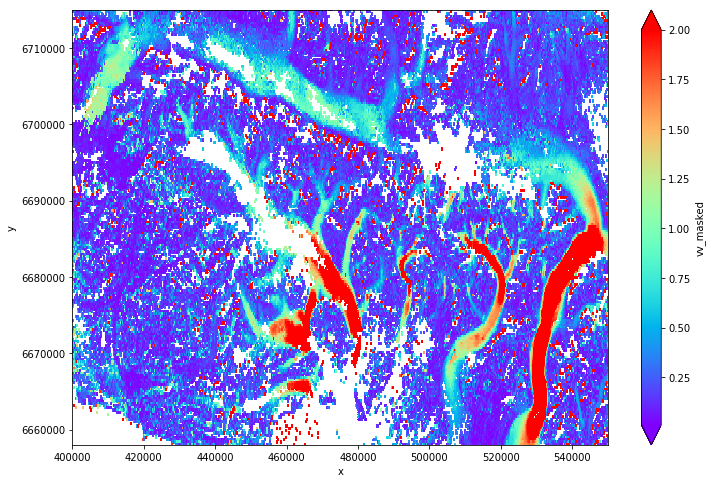

In [205]:
# Ok not pretty but hypothesis verified. Switching the order produces an out-of-bounds.
# 
# Moving on to more about the coordinates and the values...
#    - The y's are in the 6.6 million range, the x's are in the 500,000 range.
#    - 18 meters per day is a bit high... 
#    - What we need is a plot to trial-and-error determine a good threshold for min and max speeds
minGuess = 0.01
maxGuess = 2.0
m[0].vv_masked.plot(figsize=(12,8),cmap=plt.cm.rainbow,vmin=minGuess, vmax=maxGuess) # rainbow > bwr blue-white-red

# Uncomment these to focus on the interesting part of the image...
plt.xlim(400000,550000)
plt.ylim(6658000,6715000)

In [206]:
# Returning to the question of 'when' for this data let's do the by-now obvious thing...
m[0]['image_pair_times']

<xarray.DataArray 'image_pair_times' ()>
array(b'',
      dtype='|S1')
Attributes:
    del_t:                    16.0
    del_t_units:              days
    del_t_speed_units:        m/d
    start_time_decimal_year:  2014.13424658
    mid_time_decimal_year:    2014.15616438
    end_time_decimal_year:    2014.17808219
    start_date:               2014-02-19T00:00:00
    mid_date:                 2014-02-27T00:00:00
    end_date:                 2014-03-07T00:00:00

In [162]:
# ok let's just get the start_date attribute
m[0]['image_pair_times'].start_date

'2014-02-19T00:00:00'

In [211]:
# We actually have these dates 'in hand' when we can use them as Python datetimes
#   so let's do that conversion using 'string parse time' abbreviated 'strptime'
from datetime import datetime
d0 = datetime.strptime(m[0]['image_pair_times'].start_date, '%Y-%m-%dT%H:%M:%S')
d1 = datetime.strptime(m[0]['image_pair_times'].end_date, '%Y-%m-%dT%H:%M:%S')
print(d0)
print(d1)
print('interval is', d1 - d0)

2014-02-19 00:00:00
2014-03-07 00:00:00
interval is 16 days, 0:00:00


### Another breath

Ok so good, now we have a handle on the time and we have a means of way of pulling out data values.
What we do not have yet is indexing by coordinates (i.e. by meters) instead of array index; and we 
do not have the end result, compilations of 'good data' sites where we can show speed variability with time.


Let's next hearken back to the idea of reading about xarray DataArrays to understand them. The documentation
proves to be a Tower of Hanoi as each sentence is full of terminology that leads to other pages of documentation.
More directed documentation can be found in the geohackweek GitHub repo:


[Geohackweek - nDarrays - xarray documentation](https://geohackweek.github.io/nDarrays/02-xarray-architecture/)


This site emphasizes that xarray DataArrays are extensions of the numpy nDarray n-dimensional array. 
'Extension' in the sense that they have labeled dimensions and coordinates. I don't fully appreciate the 
difference but key is getting away from indexing arrays by integers: 0, 1, ..., dim-1. 


Here is the official documentation link: 


[xarray DataArray documentation](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html)


The attributes of an xarray DataArray are five in number. They are referenced without brackets or quotes or parens...


- dims
- values
- coords
- name
- attrs is an ordered dictionary of metadata


Let's examine these five things in order for our good friend the masked speed array vv_masked:

In [212]:
# Further proof that y comes first...
m[0]['vv_masked'].dims

('y', 'x')

In [213]:
# This one was done up above; remember the list of lists of nans?
# m[0]['vv_masked'].values

In [214]:
# x is listed first by y comes first in referencing locations; and notice x increases west to east
#   whereas y decreases north to south...
m[0]['vv_masked'].coords

Coordinates:
  * x        (x) float64 3.331e+05 3.334e+05 3.337e+05 3.34e+05 3.343e+05 ...
  * y        (y) float64 6.786e+06 6.785e+06 6.785e+06 6.785e+06 6.784e+06 ...

In [215]:
m[0]['vv_masked'].name

'vv_masked'

In [216]:
m[0]['vv_masked'].attrs

OrderedDict([('grid_mapping', 'transverse_mercator'),
             ('standard_name', 'speed_masked'),
             ('long_name', 'magnitude of velocity (masked)'),
             ('units', 'm/d'),
             ('masking_info',
              'masked_where(((del_corr_arr<0.100)&(corr_arr<1.000))|(corr_arr<0.500))')])

In [217]:
# Old-school programming with integer indices...
#   m[0]['vv_masked'][a:b,c:d].values uses integers a, b, c, d to print a matrix of speeds, as in...
a = 249        # the y values, indexing north to south decreasing numerical (see image above)
b = 251        #   and this corresponds to increasing index
c = 749        # the x values, indexing west to east increasing numerical
d = 751        #   and this corresponds to increasing index
m[0]['vv_masked'][a:b,c:d].values

array([[ 0.21738425,  0.37444881],
       [ 0.2512998 ,  0.27024233]])

...but this style of indexing by integers is what we are trying to escape...

In [230]:
# y 493
# x 650
a=m[0]['vv_masked'][493,650]
print(a.coords)

Coordinates:
    x        float64 5.281e+05
    y        float64 6.638e+06


In [250]:
# y 493
# x 650
y0 = 250
a=m[0]['vv_masked'].isel(y=slice(493,499),x=slice(650,655))
print(a.coords['x'])
print(a.coords['y'])
print(a.values)

<xarray.DataArray 'x' (x: 5)>
array([ 528142.5,  528442.5,  528742.5,  529042.5,  529342.5])
Coordinates:
  * x        (x) float64 5.281e+05 5.284e+05 5.287e+05 5.29e+05 5.293e+05
Attributes:
    standard_name:  projection_x_coordinate
    long_name:      x coordinate of projection
    units:          m
<xarray.DataArray 'y' (y: 6)>
array([ 6637657.5,  6637357.5,  6637057.5,  6636757.5,  6636457.5,  6636157.5])
Coordinates:
  * y        (y) float64 6.638e+06 6.637e+06 6.637e+06 6.637e+06 6.636e+06 ...
Attributes:
    standard_name:  projection_y_coordinate
    long_name:      y coordinate of projection
    units:          m
[[ 18.03541374          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [         nan          nan 

In [252]:
northing = 6637657.5
easting = 528142.5
a = m[0]['vv_masked'].sel(y=northing, x=easting, method='nearest')
# a = m[0]['vv_masked'].sel(y=northing, x=easting)
a.values

array(18.03541374206543)

### oh by the way... shortcuts

[This blog post](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) has some really useful shortcuts
for operating Jupyter notebooks including the idea of an ESC escape mode:

- a adds a cell above
- b adds a cell below
- m changes a selected cell to markdown
- y changes a cell to code
- d twice deletes the current cell
- Shift + Tab will show you the Docstring (documentation) for the the object you have just typed in a code cell - you can keep pressing this short cut to cycle through a few modes of documentation
- Ctrl Shift - will split the current cell into two from where your cursor is
- f Find and replace on your code but not the outputs.
- o Toggle cell output


- Shift + J or Shift + down does multi-select downwards
- Shift + K or Shift + up does upwards
- Shift + M to merge


In [234]:
a.values

array(nan)

In [267]:
# At this point it is good to remember 
# I will compile a list of (x, y) tuples where the velocity is reasonable
#   so I am in effect masking the mask. 
min_good = 0.5
max_good = 10.0
good=[]

# This obvious nested loop approach is *very* slow but it does seem to work
# Notice it is commented out because there must be a faster way
# for j in range(300): # the 828 y-coordinate 
#     for i in range(300): # the 819 x-coordinate
#         s = m[0]['vv_masked'][j,i].values
#         if s >= min_good and s <= max_good:
#             good.append((j, i))

# This loop is instructive because it prints 819 twice meaning that it loops over the y-index 
#   and generates a list of the x values. I comment it out to move on to the next test.
# count = 0
# for speed in m[0]['vv_masked'][:]:    ...or equivalently...
# for speed in m[0]['vv_masked']:
#     print(len(speed.values))
#     count += 1
#     if count > 1: break

# count = 0
# for row in m[0]['vv_masked']:
#     for entry in row:
#         if entry.values >= min_good and entry.values <= max_good:
#             print(entry.values, entry.get_index('x'), entry['y'].values)
#             count += 1
#         if count > 0: break
#     if count > 0: break

# xr.where(m[0]['vv_masked'].values > min_good and m[0]['vv_masked'].values < max_good, good.append('fubar'))
# a = m[0]['vv_masked'].values.sel(values > min_good)

# >>> a = xr.DataArray(np.arange(25).reshape(5, 5), dims=('x', 'y'))
a = m[0]['vv_masked']
b = a.where((a > min_good) & (a < max_good))
print(b)
b.plot
# print(count)
# print(len(good))
# good

<xarray.DataArray 'vv_masked' (y: 828, x: 819)>
dask.array<shape=(828, 819), dtype=float64, chunksize=(828, 819)>
Coordinates:
  * x        (x) float64 3.331e+05 3.334e+05 3.337e+05 3.34e+05 3.343e+05 ...
  * y        (y) float64 6.786e+06 6.785e+06 6.785e+06 6.785e+06 6.784e+06 ...
Attributes:
    grid_mapping:   transverse_mercator
    standard_name:  speed_masked
    long_name:      magnitude of velocity (masked)
    units:          m/d
    masking_info:   masked_where(((del_corr_arr<0.100)&(corr_arr<1.000))|(cor...


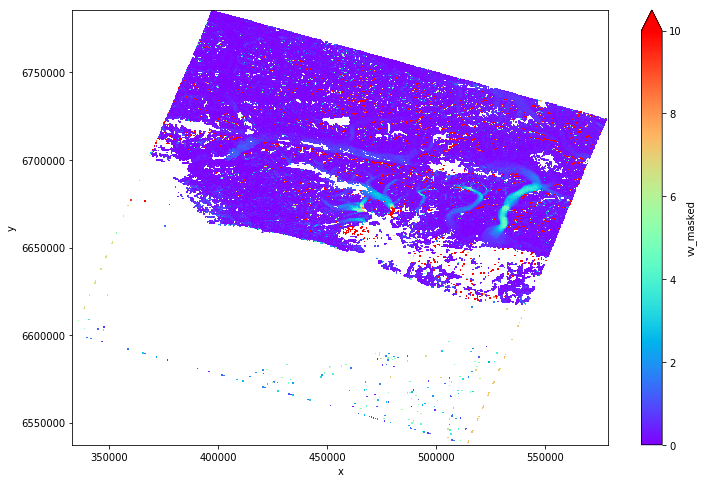

In [268]:
minGuess = 0.0
maxGuess = 10.0
a.plot(figsize=(12,8),cmap=plt.cm.rainbow,vmin=minGuess, vmax=maxGuess) # rainbow > bwr blue-white-red


/opt/anaconda/envs/x3/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/opt/anaconda/envs/x3/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less
  return func(*args2)


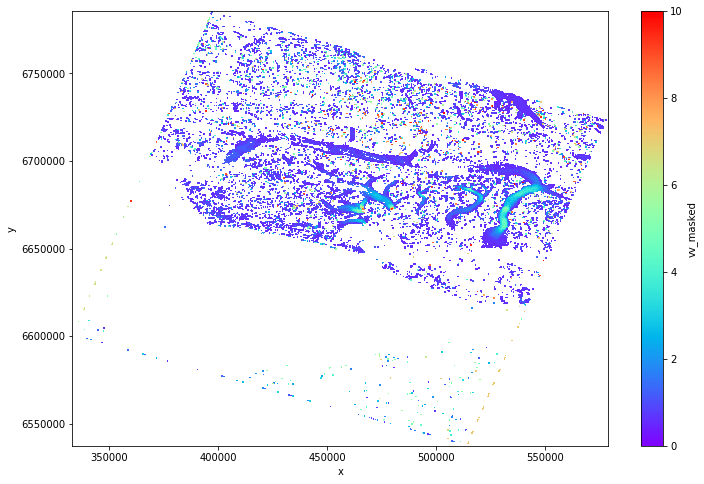

In [269]:
minGuess = 0.0
maxGuess = 10.0
b.plot(figsize=(12,8),cmap=plt.cm.rainbow,vmin=minGuess, vmax=maxGuess) # rainbow > bwr blue-white-red


In [93]:
good_copy=list(good)

In [91]:
for i in range(50):
    print(m[0]['vv_masked'][good[i]].values)

1.3054795265197754
0.14815160632133484
0.045415256172418594
0.036058209836483
0.08306105434894562
0.05657958984375
0.0693342462182045
0.06314234435558319
0.06320398300886154
0.010077390819787979
0.08115417510271072
0.04821735620498657
0.10402984172105789
0.026284601539373398
0.08006943762302399
0.09961587935686111
0.0422457754611969
0.08082971721887589
0.05063020810484886
0.1192292869091034
0.04154860973358154
0.055417709052562714
0.8856968879699707
0.11036509275436401
0.03359948471188545
0.06007859483361244
0.08105342090129852
0.0789649710059166
0.10906911641359329
0.1426508128643036
0.13439060747623444
0.11041250824928284
0.02970353700220585
0.07325969636440277
0.0699177011847496
0.030069798231124878
0.014045177958905697
0.0739385262131691
0.12126898020505905
0.05251767113804817
0.06815068423748016
0.11848915368318558
0.07790391892194748
0.16353414952754974
0.02360130101442337
0.047340039163827896
0.0551723875105381
0.06982421875
0.030716683715581894
0.03235096111893654


In [12]:
m[0].vv

<xarray.DataArray 'vv' (y: 828, x: 819)>
dask.array<shape=(828, 819), dtype=float64, chunksize=(828, 819)>
Coordinates:
  * x        (x) float64 3.331e+05 3.334e+05 3.337e+05 3.34e+05 3.343e+05 ...
  * y        (y) float64 6.786e+06 6.785e+06 6.785e+06 6.785e+06 6.784e+06 ...
Attributes:
    grid_mapping:   transverse_mercator
    standard_name:  speed
    long_name:      magnitude of velocity
    units:          m/d

In [18]:
m[0].vv_masked

<xarray.DataArray 'vv_masked' (y: 828, x: 819)>
dask.array<shape=(828, 819), dtype=float64, chunksize=(828, 819)>
Coordinates:
  * x        (x) float64 3.331e+05 3.334e+05 3.337e+05 3.34e+05 3.343e+05 ...
  * y        (y) float64 6.786e+06 6.785e+06 6.785e+06 6.785e+06 6.784e+06 ...
Attributes:
    grid_mapping:   transverse_mercator
    standard_name:  speed_masked
    long_name:      magnitude of velocity (masked)
    units:          m/d
    masking_info:   masked_where(((del_corr_arr<0.100)&(corr_arr<1.000))|(cor...

(array([ 38718.,  45083.,  25252.,  13770.,   7999.,   5519.,   4162.,
          2674.,   1917.,   1403.,   1104.,    974.,    666.,    535.,
           479.,    410.,    360.,    271.,    239.,    179.,    177.,
           178.,    173.,    173.,    196.,    227.,    226.,    178.,
           172.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9]),
 <a list of 29 Patch objects>)

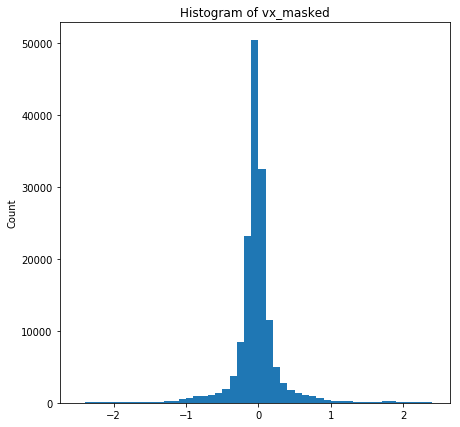

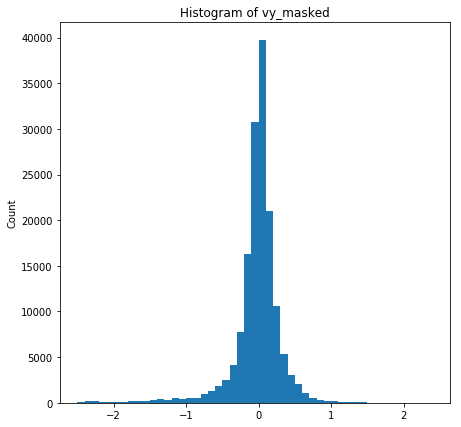

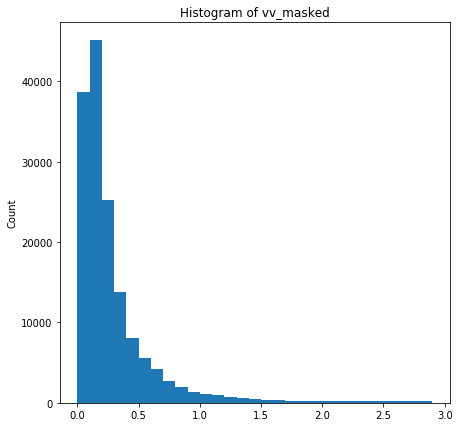

In [21]:
hist_increment = 0.10
x0 = -2.5
x1 = 2.5
s0 = 0.0
s1 = 3.0
m[0].vx_masked.plot.hist(figsize=(7,7),bins=np.arange(x0,x1,hist_increment))
m[0].vy_masked.plot.hist(figsize=(7,7),bins=np.arange(x0,x1,hist_increment))
m[0].vv_masked.plot.hist(figsize=(7,7),bins=np.arange(s0,s1,hist_increment))

(6658000, 6715000)

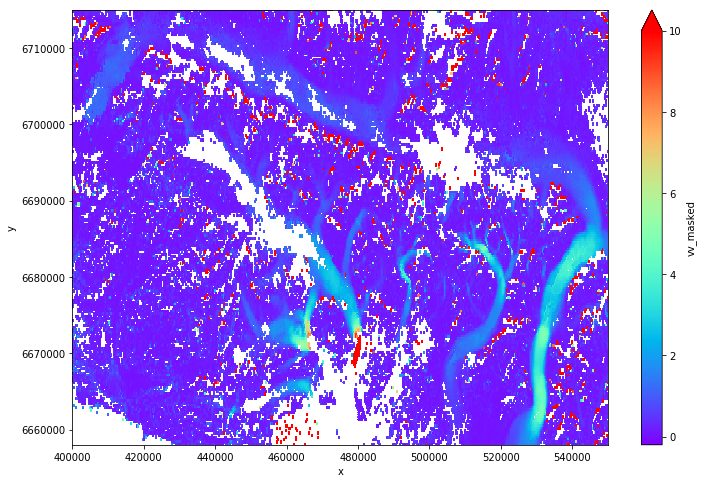

In [84]:
m[0].vv_masked.plot(figsize=(12,8),cmap=plt.cm.rainbow,vmin=-.2, vmax=10.) # over bwr blue-white-red
plt.xlim(400000,550000)
plt.ylim(6658000,6715000)


In [ ]:
print(m[0].vv_masked.speed_masked[0][0])

In [ ]:
print('hi')

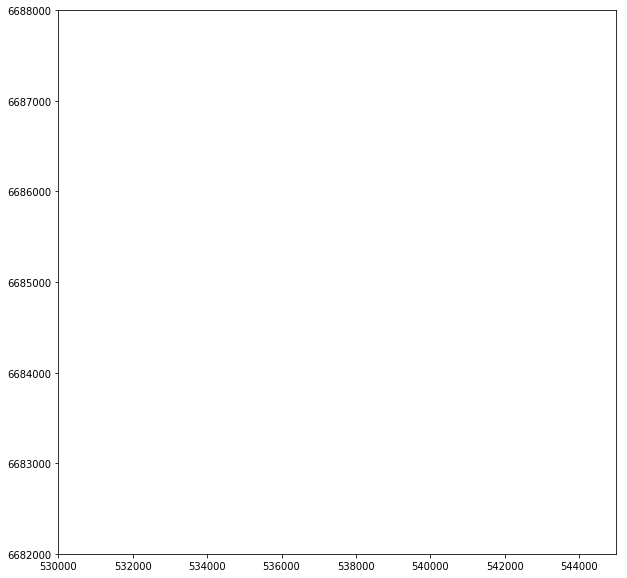

In [35]:
# from ShowCurrents(date_index)
X, Y = np.meshgrid(m[0]['y'], m[0]['x'])
U = m[0]['vy']
V = m[0]['vx']
plt.figure(figsize=(10,10))
plt.xlim(530000,545000)
plt.ylim(6682000,6688000)
# plt.title('ice velocities')
thisFigure = plt.quiver(X, Y, U, V, units='width')